## Interactively analysing temporal components of rain gage data

Import the class object RainGage and initialize it with a file containing all of the data or with a list of years. The output from this are all contained in attributed of the ** `RainGage`** class. All of the data are contained in a **`pandas.DataFrame`** object called **`RainGage.df`**

In [1]:
%matplotlib inline
from rain import *
from common import *

#### Philadelphia

In [ ]:
path = 'C:/Users/Julia/Google Drive/PHILADELPHIA/'
rg = Rain(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")

#### St Louis

In [2]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/Version1/'

rg = Rain(path=path, name='StLouis_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101, units='mm')
rad = Rain(path=path, name='StLouis_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101, units='mm')
rg.ll_file = 'lat_lon_{YEAR}.csv'.format(YEAR=rg.year)

rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll

Say we want to determine which days are wet and which aren't based on threshold. The default threshold is the minimum non-zero value recorded over a timestep. 

In [ ]:
rg.thresh

The threshold can be set by using **`Rain.thresh = `** and reset back to the default using **`Rain.reset_thresh()`** 

In [107]:
rad.thresh = rg.thresh = 0.253

In [ ]:
rg.reset_thresh()

Now we are ready to figure out which of the days are wet and which aren't

In [108]:
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()
p.get_wet()

In [ ]:
p.plot_rate(save=False)

In [109]:
p.save_path = './output/StLouis/'

In [110]:
p.thresh*p.per_hour

1.012

In [111]:
p.wet = p.rate[:]

In [112]:
def func(x):
    if x >= p.thresh*p.per_hour:
        return True
    elif x < p.thresh*p.per_hour:
        return False
    else:
        return x

In [113]:
p.wet = p.wet.apply(lambda x: x.apply(lambda x: func(x)))

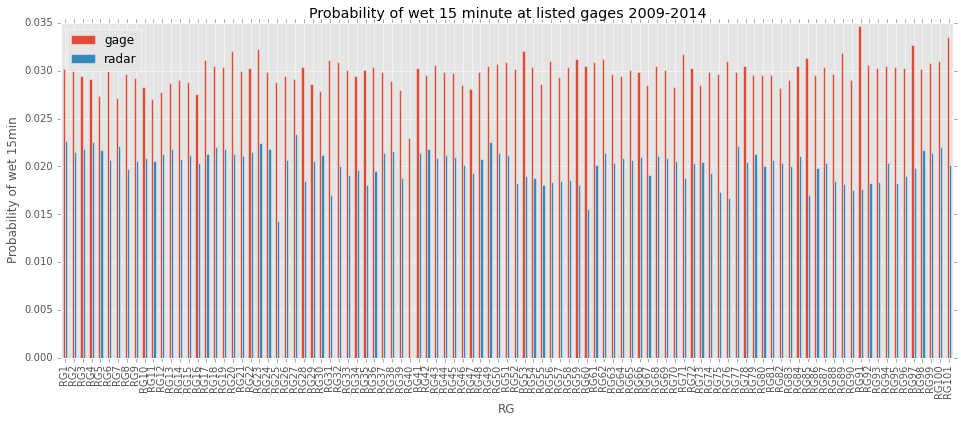

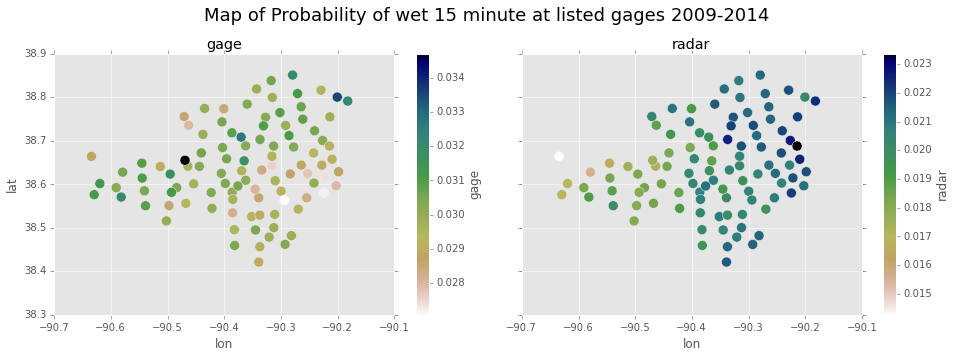

In [114]:
p.plot_prob_wet(gage=list(get_index(p.wet, 'RG')[1]), map=True)

In [ ]:
map_rain(p.ll.join(df_from_gb(p.gb, list(get_index(p.wet, 'RG')[1]))), title='Map of Probability of')

In [ ]:
p.wet.mean(axis=get_index(p.wet, 'date_time')[0]).plot(kind='bar', figsize=(16,6))
plt.show()

## Plotting probability of wet days occuring

We can make plots of the probability that different months will be wet:

In [ ]:
rg.get_prob_wet(interval='seasonal')

We can make plots of the probability that different hours will be wet:

In [ ]:
rg.get_prob_wet(interval='diurnal')

If we are interested in the difference between the hours with a closer look at the months: 

In [ ]:
rg.get_prob_wet(interval='seasonal', gages=['RG1', 'RG5', 'RG10', 'RG15'])

There are a range of options that we can add on to this if we want to look at a specific month (say February and September), at a specific time (say from noon to midnight) and at a different time step (say hourly):

In [ ]:
rg.get_prob_wet(show_all=True, month=[2,9], hour=range(11,24), time_step='1H')

If instead we are interested in specific gages, we can give the function a list of the gages that we want to see.

In [ ]:
rg.get_prob_wet(gage=['RG1','RG2','RG3'], interval='seasonal')

Build your own if you get frustrated with the limited functionality, you have access the dataframe for the group run most recently when you call `RainGage.show_all`

In [ ]:
rg.show_all[[4,8,12]].loc[range(0,24,3)].plot(kind='bar', figsize=(16,6))
plt.show()

## Plotting distribution of rain rates for wet days

When we are satisfied with the wet dry aspect of things we can make different assortments of boxplots to highlight the distribution of rainfall across months:

In [ ]:
rg.get_boxplots(interval='seasonal')
rg.get_distribution(interval='seasonal')

Across hours:

In [ ]:
rg.get_boxplots(interval='diurnal')
rg.get_distribution(interval='diurnal')

That was an average of all the months at each hour, but say we are just interested in September again:

In [ ]:
rg.get_boxplots(month=9, look_closer=[0,4,8,12,16,20])

We can also change the time_step at which we evaluate rainfall from 15 minute, to 1 hour, or 1 day, or whatever we want!

In [ ]:
rg.get_boxplots(interval='seasonal', time_step='1D')

In [ ]:
rg.get_boxplots(interval='seasonal',gage=['RG1', 'RG2', 'RG3'])

## Build your own functionality

You can also just use all the functionality available natively in **`pandas.DataFrame`** objects. 

In [ ]:
rg.df.cumsum(axis=0).plot(figsize=(16,6), legend=None)